<a href="https://colab.research.google.com/github/Jingsai/CMPT300G/blob/master/handouts/Lecture2_Building_MLPs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

# Activation functions

Call activation functions typically on a single value calculated as the weighted sum of outputs from previous layer, except Softmax below.

**Question:** Why do we even need activation functions in the network?

- Step
  - $sign(z)$
  - linear and flat

- Sigmoid/Logistic
  - $\sigma(z) = \frac{e^z}{1+e^z} = \frac{1}{1+e^{-z}}$
  - S-shaped, continuous, differentiable 
  - binary probability 
  - bounded output between 0 and 1

- Tanh
  - $tanh(z) = 2\sigma(2z)-1$
  - similar to sigmoid but has range from -1 to 1

- ReLU (Rectified Linear Unit)
  - $max(0,z)$
  - default activation 
  - simple and fast 
  - no maximum limit on output
  - not differentiable at 0

- Softplus
  - $log(1+e^z)$
  - a smooth varient of ReLU 

- Softmax (talk more later in section of classification MLPs)
  - $\frac{e^{z_i}}{\Sigma e^{z_i}}$
  - an extension of logistic function from binary to multiple classes
  - probability version of argmax 
  - takes multiple weighted sums as input and return a vertor of probabilities which add up to 1 

In [ ]:
def linear(z):
    return z 

def softplus(z):
    return np.log(1+np.exp(z))
    
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

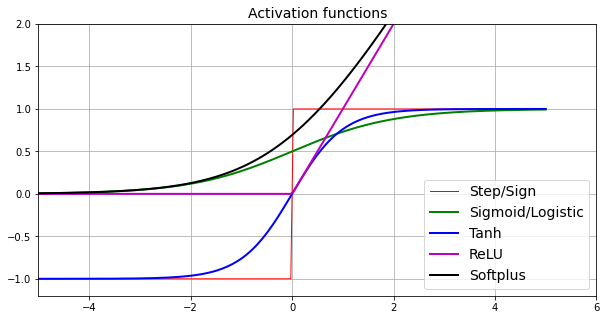

In [ ]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(10,5))

plt.plot(z, np.sign(z), "r", linewidth=1, label="Step/Sign")
plt.plot(z, sigmoid(z), "g", linewidth=2, label="Sigmoid/Logistic")
plt.plot(z, np.tanh(z), "b", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m", linewidth=2, label="ReLU")
# plt.plot(z, linear(z), "k", linewidth=2, label="Linear")
plt.plot(z, softplus(z), "k", linewidth=2, label="Softplus")
plt.grid(True)
plt.legend(loc="lower right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 6, -1.2, 2])
plt.show()

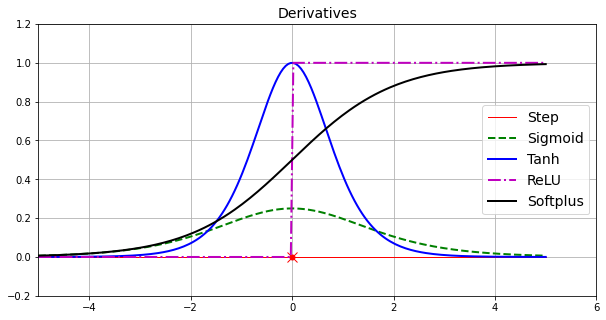

In [ ]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(10,5))

plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.plot(z, derivative(softplus, z), "k", linewidth=2, label="Softplus")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 6, -0.2, 1.2])
plt.show()

## Train neural network using Backpropagation

- training set *vs* testing set *vs* validation set 
  - use validation set to adjust parameters during training on training set
  - only use testing set once when the model is finally finishing training

- batch vs epoch
  - the default batch size is 32 (32 samples)
  - use batch to fit the limit of the computational resources for each training loop  

- input, hidden, output layer 
  - learn patterns gradually from simple to complex layer by layer 

- activation fucntion
  - do not use flat function like step or heaviside because the gradient is constant 

- loss function 
  - use loss function to evaluate the overall error of the network by comparing the predicted output and the actual output
  - MSE or MAE for regression task
  - Cross entropy for classification task (comparing distances between two probability distributions (vectors on the output layer)) 

- backpropagation
  - the goal of training the network is to minimize the error by adjusting the weights iteratively forward and backword passing through the network
  - the key idea of adjusting the weights towards reducing the error is changing the error gradients using the Gradient Descent backwardly layer by layer via chain rule
  - initialize all weights randomly instead of using all 0 or 1. **Why?**

- evaluation metrics 
  - accuracy for classification task (correct or incorrect on the prediction label comparing with the actual label)

## Classification MLPs

- input neuron
  - one per feature (e.g. one per pixel for images)

- hidden neuron
  - depends on the problem. 
  - 1-5 layers
  - 10-100 neurons per layer

- output neuron
  - 1 for binary classification (e.g. red or blue)
  - 1 per label for multilabel binary classification (e.g. spam or not spam, urgent or not urget email)
  - 1 per class for multiclass classification (e.g. digits 0-9) 

- hidden activation
  - ReLU at default or others

- output activation
  - produce the probabilities for each label and choose the label with highest probability as the prediction 
  - logistic or tanh for binary classification
  - softmax for multiclass classification 
    - an extension of logistic from binary to multiple labels
    - combine and convert the outputs to a vector of probabilies which add up to 1.

- loss function (https://keras.io/api/losses/) 
  - sparse_categorical_crossentropy for sparse and exclusive labels (e.g. using a single integer to represent a class) 
  - categorical_crossentropy for vector labels (e.g. using one-hot code like [0,1,0,0,0] to represent a class)
  - binary_crossentropy 

- metrics
  - accuracy 

- optimizer, regulization, learning rate (Will learn later in other lectures)

## Activity 

Visit the TensorFlow Playground at https://playground.tensorflow.org/

- **Layers and patterns**: try training the default neural network by clicking the run button (top left). Notice how it quickly finds a good solution for the classification
task. Notice that the neurons in the first hidden layer have learned simple
patterns, while the neurons in the second hidden layer have learned to combine
the simple patterns of the first hidden layer into more complex patterns.
In general, **the more layers, the more complex the patterns can be.**

- **Activation function**: try replacing the Tanh activation function with the ReLU
activation function, and train the network again. Notice that it finds a solution
even **faster**, but this time the **boundaries are linear**. This is due to the shape of
the ReLU function.

- **Local minima**: modify the network architecture to have just one hidden layer
with three neurons. Train it multiple times (to reset the network weights, click
the reset button next to the play button). Notice that the training time varies a
lot, and sometimes it even gets stuck in a local minimum.

- **Too small**: now remove one neuron to keep just 2. Notice that the neural network
is now incapable of finding a good solution, even if you try multiple
times. The model has too few parameters and it systematically underfits the
training set.

- **Large enough**: next, set the number of neurons to 8 and train the network several
times. Notice that it is now consistently fast and never gets stuck. This
highlights an important finding in neural network theory: large neural networks
almost never get stuck in local minima, and even when they do these
local optima are almost as good as the global optimum. However, they can still
get stuck on long plateaus for a long time.

- More: now change the dataset to be the spiral (bottom
right dataset under “DATA”). go ahead and play with the other parameters to get a feel of what they
do. In fact, you should definitely play with this UI for at least one hour, it will
grow your intuitions about neural networks significantly.